<div class="frontmatter text-center">
<h1> DNDS 6002: Data and Network Visualization</h1>
<h2> Final project 1 - Student alcohol consumption </h2>
<h3>Central European University, Fall 2018/2019</h3>
<h3>Student name: Hao CUI </h3>
</div>

<big> <big> <big> **Contents:** </big> </big> </big>

<br> <big> **1. Motivation** </big>
> Alcohol influences our lives badly in various aspects. For teenage students, alcohol can play a negative role in their study and social life, reducing their mental and physical abilities which can cause trouble for their future development. In this project, we will visualize students academic performance and alcohol consumption varying by age and gender. We will explore and arrive at the most appropriate visualization step by step. 

<br> <big> **2. Dataset description** </big>
> Downloaded from Kaggle
<br> Dimension: $649 \times 33$
<br> **Important variables**: 
<br> Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high), 
<br> Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
<br> G1 - first period grade (numeric: from 0 to 20)
<br> G2 - second period grade (numeric: from 0 to 20)
<br> G3 - final grade (numeric: from 0 to 20)

<br> <big> **3. Data Visualization** </big>
> (1) **Academic performance**
<br> &ensp;&ensp;&ensp; Compare the boxplots and violinplots of final grades by gender
<br> &ensp;&ensp;&ensp; Compare the splitted violinplots of final grades by gender and whether they are heavy drinkers, with and 
<br> &ensp;&ensp;&ensp; without boxplots inside violinplots
<br>
<br>
(2) **Alcohol consumption**
<br> &ensp;&ensp;&ensp; See the age distribution, drop those with too few values (in order for the violinplots). 
<br> &ensp;&ensp;&ensp; Violinplots of students alcohol consumption on workdays and weekends by age and gender
<br> &ensp;&ensp;&ensp; **Improvements**: heatmap
<br> &ensp;&ensp;&ensp; Compare two different positions of the subplots and colorbars
<br>
<br>

<br> <big> **4. Discussions** </big>
> (1) In violinplot function, "scale" {“area”, “count”, “width”} is used to scale the width of each violin. If area, each violin will have the same area. If count, the width of the violins will be scaled by the number of observations in that bin. If width, each violin will have the same width. In this project, the gender ratio is not 1:1, "scale" is set by area.
<br> (2) For splitted violinplots, there are KDEs on both sides, however, the boxplot inside is for both of them. In order to see the quartiles of each splitting parts, we set inner="quartile" instead of inner="box".
<br> (3) Violinplots are not suitable for small data. 
<br> (4) It is important to select appropriate colormap and its scale for heatmap. 

### Let's get started!

In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#### Read the csv dataset as pandas dataframe

In [3]:
df = pd.read_csv("student-por.csv")  

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#### See the gender ratio

In [37]:
print(df['sex'][df['sex']=='F'].count()/df['sex'].count()) #0.5901386748844376
print(df['sex'][df['sex']=='M'].count()/df['sex'].count()) #0.4098613251155624

0.5901386748844376
0.4098613251155624


## (1) Students academic performance
Explore which plot describes the best.

#### (a) Distribution of students final grades by gender
As shown below, violinplots are better than boxplots.
Since the gender ratio is not 1:1, set scale="area" in the violinplot to make violinplot areas the same for female and male students.

Text(0.5,0.95,'Students grades by gender')

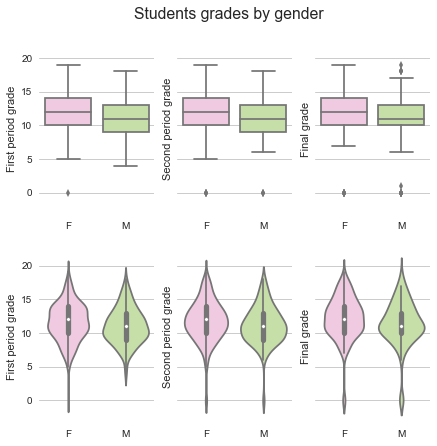

In [34]:
f2, axes = plt.subplots(2,3, figsize=(7, 7), sharey=True)

sns.set(style="whitegrid",  color_codes=True)  
sns.despine(left=True)

sns.boxplot(x="sex", y="G1", data=df2,
                   palette="PiYG", ax=axes[0,0])

axes[0,0].set_xlabel('')    
axes[0,0].set_ylabel("First period grade")
axes[0,0].spines['bottom'].set_visible(False)  


sns.boxplot(x="sex", y="G2", data=df2, 
                   palette="PiYG", ax=axes[0,1])

axes[0,1].set_xlabel('')    
axes[0,1].set_ylabel("Second period grade")
axes[0,1].spines['bottom'].set_visible(False)  

sns.boxplot(x="sex", y="G3", data=df2,
                   palette="PiYG", ax=axes[0,2])

axes[0,2].set_xlabel('')    
axes[0,2].set_ylabel("Final grade")
axes[0,2].spines['bottom'].set_visible(False)  

sns.violinplot(x="sex", y="G1", data=df2, scale="area",
                   palette="PiYG", ax=axes[1,0])

axes[1,0].set_xlabel('')    
axes[1,0].set_ylabel("First period grade")
axes[1,0].spines['bottom'].set_visible(False)  


sns.violinplot(x="sex", y="G2", data=df2, scale="area",
                   palette="PiYG", ax=axes[1,1])

axes[1,1].set_xlabel('')    
axes[1,1].set_ylabel("Second period grade")
axes[1,1].spines['bottom'].set_visible(False)  

sns.violinplot(x="sex", y="G3", data=df2, scale="area",
                   palette="PiYG", ax=axes[1,2])

axes[1,2].set_xlabel('')    
axes[1,2].set_ylabel("Final grade")
axes[1,2].spines['bottom'].set_visible(False)  

f2.suptitle('Students grades by gender', size=15.8, y=0.95)

#### (b) Add one more dimension. Distribution of students final grades by gender and whether they are heavy drinkers

#### Create a new variable Talc (total alcohol consumption) by linearly combining Dalc and Walc
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
<br> Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


In [20]:
df['Talc']=(df['Dalc']*5+df['Walc']*2)/7   #create new variable

#### Choose a suitable threshold to separate heavy alcohol drinkers: Talc >= 2 is high consumption 


In [21]:
print(df['Talc'][df['Talc']>=3].count()/df['Talc'].count()) #0.11556240369799692
print(df['Talc'][df['Talc']>=2].count()/df['Talc'].count()) #0.3081664098613251

0.11556240369799692
0.3081664098613251


In [22]:
def high(input_value):               #convert the value of total alcohol to high and low
    if  input_value>= 2:             #according to threshold 2
        input_value='Yes'
        return input_value
    else:
        input_value='No'
        return input_value
    
df['High']=df['Talc'].apply(high)      #create own column
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Talc,High
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,1.000000,No
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,1.000000,No
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,2.285714,Yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,1.000000,No
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,1.285714,No


#### The next plot depicts violinplots with boxplots inside. Subplots share one legend and y axis for simplicity.

Text(0.5,0.98,'Students grades by gender and whether heavy drinkers')

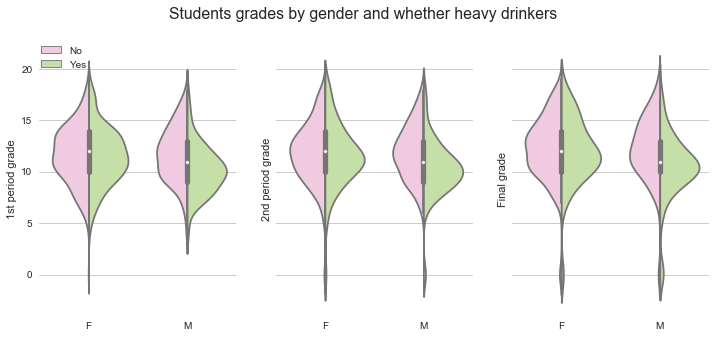

In [35]:
f2, axes = plt.subplots(1,3, figsize=(12, 5), sharey=True)

sns.set(style="whitegrid",  color_codes=True) 
sns.despine(left=True)


sns.violinplot(x="sex", y="G1",
                 hue="High", scale="area",
                 data=df,  split=True, palette="PiYG", 
                 height=4, aspect=.7, ax=axes[0])
axes[0].set_xlabel('')    
axes[0].set_ylabel("1st period grade")
axes[0].legend(bbox_to_anchor=(-0.01, 1.002), loc=2, borderaxespad=0.) #set legend position
axes[0].spines['bottom'].set_visible(False)  


sns.violinplot(x="sex", y="G2",
                 hue="High", scale="area",
                 data=df,  split=True, palette="PiYG", 
                 height=4, aspect=.7, ax=axes[1])
axes[1].get_legend().set_visible(False)
axes[1].set_xlabel('')    
axes[1].set_ylabel("2nd period grade")
axes[1].spines['bottom'].set_visible(False) 


sns.violinplot(x="sex", y="G3",
                 hue="High", scale="area",
                 data=df,  split=True, palette="PiYG", 
                 height=4, aspect=.7, ax=axes[2])
axes[2].get_legend().set_visible(False)
axes[2].set_xlabel('')    
axes[2].set_ylabel("Final grade")
axes[2].spines['bottom'].set_visible(False)


f2.suptitle('Students grades by gender and whether heavy drinkers', size=15.8)

#### However, the boxplots inside the violinplots can't represent female and male students individually. Thus, it is better to use inner="quartile" inside the violinplots to show the quartiles of both female and male students.

Text(0.5,0.98,'Students grades by gender and whether heavy drinkers')

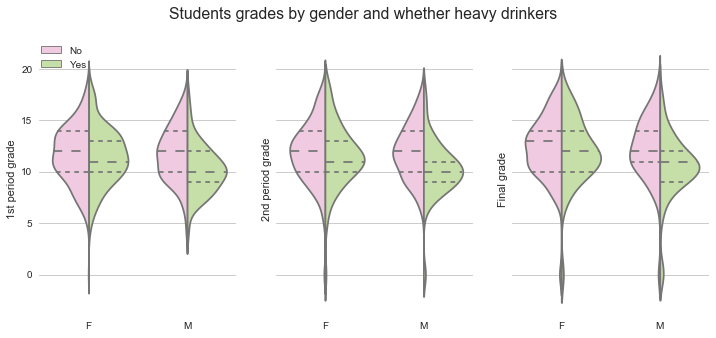

In [36]:
f2, axes = plt.subplots(1,3, figsize=(12, 5), sharey=True)

sns.set(style="whitegrid",  color_codes=True) 
sns.despine(left=True)

sns.violinplot(x="sex", y="G1",
                 hue="High", scale="area", 
                 data=df,  split=True, inner="quartile", palette="PiYG", 
                 height=4, aspect=.7, ax=axes[0])
axes[0].set_xlabel('')    
axes[0].set_ylabel("1st period grade")
axes[0].legend(bbox_to_anchor=(-0.01, 1.002), loc=2, borderaxespad=0.) #set legend position
axes[0].spines['bottom'].set_visible(False)  

sns.violinplot(x="sex", y="G2",
                 hue="High", scale="area",
                 data=df,  split=True, inner="quartile", palette="PiYG", 
                 height=4, aspect=.7, ax=axes[1])
axes[1].get_legend().set_visible(False)
axes[1].set_xlabel('')    
axes[1].set_ylabel("2nd period grade")
axes[1].spines['bottom'].set_visible(False)  

sns.violinplot(x="sex", y="G3",
                 hue="High", scale="area",
                 data=df,  split=True, inner="quartile", palette="PiYG", 
                 height=4, aspect=.7, ax=axes[2])
axes[2].get_legend().set_visible(False)
axes[2].set_xlabel('')    
axes[2].set_ylabel("Final grade")
axes[2].spines['bottom'].set_visible(False) 

f2.suptitle('Students grades by gender and whether heavy drinkers', size=15.8)

## (2) Students alcohol consumption

#### Distribution of age

Text(0.5,1.05,'Students age distribution')

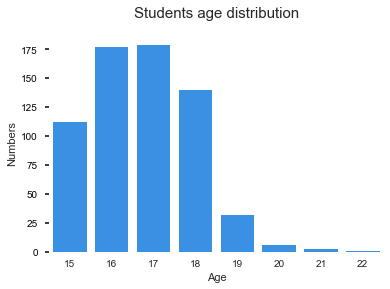

In [82]:
fig, ax= plt.subplots(1, 1)
sns.set(style="white")

sns.barplot(x=np.arange(15, 23), y=df.groupby(['age'])['age'].count(),  color="dodgerblue")
ax.set_xlabel("Age")
ax.set_ylabel("Numbers")

ax.spines['bottom'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.tick_params(direction='out', axis='y', length=4, width=1.5, colors='black',
               grid_color='black', grid_alpha=0.1)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 
plt.title('Students age distribution', size=15, y=1.05)

In [83]:
fig.savefig("age distribution.png") 

#### Drop the values of age 21 and 22, since they are too few for violinplots

In [6]:
df2=df[df.age !=21]
df2=df2[df2.age !=22]

#### Female and male students alcohol consumptions are shown indivisually by violinplots. However, two violinplots can be reduced to one.

Text(0.5,0.98,'Students alcohol consumption on workdays and weekends by age and gender')

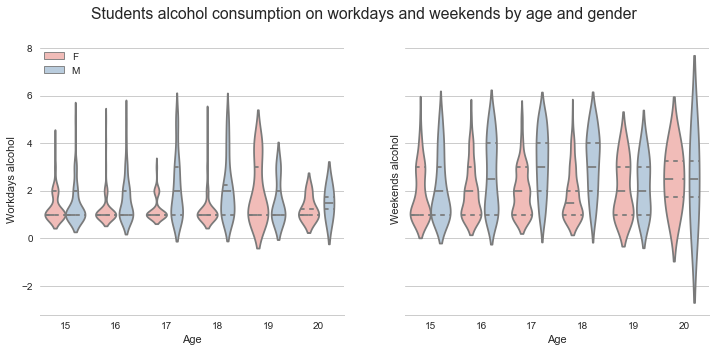

In [85]:
f1, axes = plt.subplots(1,2, figsize=(12, 5), sharey=True)

sns.set(style="whitegrid", color_codes=True) 

sns.violinplot(x="age", y="Dalc", data=df2, hue='sex', 
                   palette="Pastel1", scale="count", inner="quartile",  ax=axes[0]) 
sns.despine(left=True)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Workdays alcohol")

axes[0].legend(bbox_to_anchor=(0, 0.98), loc=2, borderaxespad=0.) #set legend position


sns.violinplot(x="age", y="Walc", data=df2, hue="sex", scale="count",
                   palette="Pastel1", inner="quartile", ax=axes[1])

axes[1].get_legend().set_visible(False)
axes[1].set_ylabel("Weekends alcohol")
axes[1].set_xlabel("Age")

f1.suptitle('Students alcohol consumption on workdays and weekends by age and gender', size=15.8)


In [86]:
f1.savefig("alcohol1.png") 

#### Splitting the violinplots by gender gives the same information as the previous plot, as well as reducing redundant plots.

Text(0.5,0.98,'Students alcohol consumption on weekdays and weekends by age and gender')

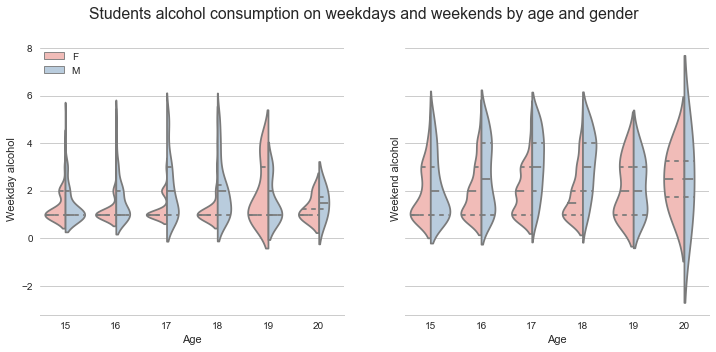

In [87]:
f2, axes = plt.subplots(1,2, figsize=(12, 5), sharey=True)

sns.set(style="whitegrid", color_codes=True) 

sns.violinplot(x="age", y="Dalc", data=df2, hue='sex', 
                   palette="Pastel1", scale="count", inner="quartile", split=True, ax=axes[0])
sns.despine(left=True)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Weekday alcohol")

axes[0].legend(bbox_to_anchor=(0, 0.98), loc=2, borderaxespad=0.) 

sns.violinplot(x="age", y="Walc", data=df2, hue='sex', 
                   palette="Pastel1", split=True, scale="count", inner="quartile", ax=axes[1]) 
axes[1].get_legend().set_visible(False)

axes[1].set_xlabel("Age")
axes[1].set_ylabel("Weekend alcohol")

f2.suptitle('Students alcohol consumption on weekdays and weekends by age and gender', size=15.8)


In [95]:
f2.savefig("alcohol2.png") 

#### However, there are still drawbacks of the previous splitted violinplots. 
(1) Some quartiles are not shown/easily recognized.
<br> (2) The tail of the age 20 violinplot doesn't seem to be correct, the minimum alcohol consumption is 1. (Perhaps for the reason that violins for relatively small samples might look misleadingly smooth.)

#### We see that there are only two values for age equals 20

In [203]:
len(df_M[df_M["age"]==20]) #2

df_M["Walc"][df_M["age"]==20]

351    1
574    4
Name: Walc, dtype: int64

## Improve by using heatmap

#### Separate the dataframe by gender

In [39]:
df_F=df[df['sex']=='F']

In [40]:
df_M=df[df['sex']=='M']

In [41]:
df_M.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Talc,High
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,6,12,12,13,1.285714,No
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,1,1,3,0,13,12,13,1.000000,No
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,1,1,1,0,15,16,17,1.000000,No
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,1,5,0,12,12,13,1.000000,No
12,GP,M,15,U,LE3,T,4,4,health,services,...,3,1,3,5,0,12,13,12,1.571429,No


In [42]:
len(df_M)

266

In [43]:
df1=df_M[df_M.age !=22]

In [44]:
len(df1)

265

#### Use heatmap to visualize students alcohol consumption on workdays and weekends by gender

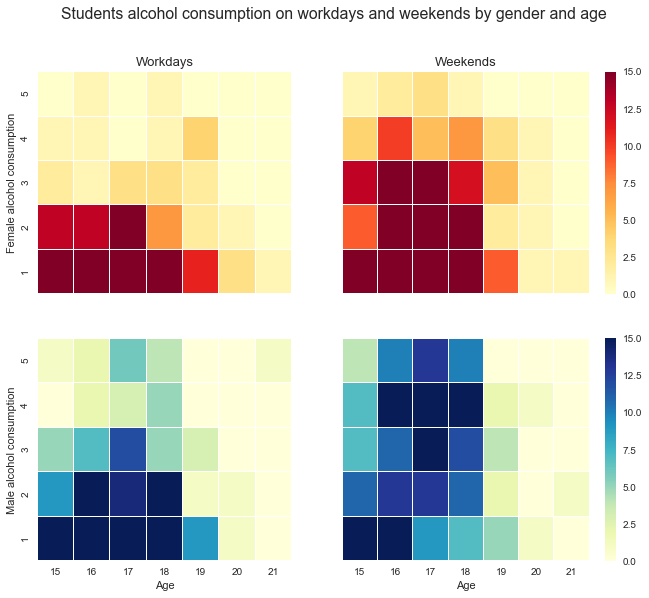

In [96]:
grid_kws = {'width_ratios': (0.7,0.85), 'wspace': 0.18}
f3, axes = plt.subplots(2,2, gridspec_kw=grid_kws, sharey=True)  #figsize=(10, 7),
f3.set_size_inches(11, 9) 

##############################
pd_crosstab_F = pd.crosstab(df_F["Dalc"], df_F["age"])
sns.heatmap(pd_crosstab_F,  linewidths=0.01, linecolor='white', 
             cmap='YlOrRd',xticklabels =False, yticklabels =np.arange(1,5,1), cbar=False, vmin=0, vmax=15, ax=axes[0,0]) 
axes[0,0].invert_yaxis()

axes[0,0].set_ylabel('Female alcohol consumption', size=11)  
axes[0,0].set_xlabel('')
axes[0,0].set_title('Workdays', size=13)


##############################
pd_crosstab_M = pd.crosstab(df1["Dalc"], df1["age"])
sns.heatmap(pd_crosstab_M, linewidths=0.01, linecolor='white', xticklabels =True, 
                yticklabels=True, cmap='YlGnBu',vmin=0, vmax=15, cbar=False,
                cbar_ax=None, ax=axes[1,0]) # #
axes[1,0].set_ylabel('Male alcohol consumption', size=11)  
axes[1,0].set_xlabel('Age')

##############################

pd_crosstab_Fd = pd.crosstab(df_F["Walc"], df_F["age"])
sns.heatmap(pd_crosstab_Fd,  linewidths=0.01, linecolor='white', 
            xticklabels =False,  #yticklabels=True,
            cmap='YlOrRd',vmin=0, vmax=15, ax=axes[0,1])
#axes[0,1].set_ylabel('Female alcohol consumption', size=11)  
axes[0,1].invert_yaxis()
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

axes[0,1].set_title('Weekends', size=13)

##############################

pd_crosstab_Md = pd.crosstab(df1["Walc"], df1["age"])
sns.heatmap(pd_crosstab_Md, linewidths=0.01, linecolor='white', xticklabels =True, 
            yticklabels =True, cmap='YlGnBu',vmin=0, vmax=15, ax=axes[1,1])
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('')  

f3.suptitle('Students alcohol consumption on workdays and weekends by gender and age', size=15.8)

plt.show()

In [97]:
f3.savefig("alcohol3.png") 

#### Rearrange the positions of plots and colorbars

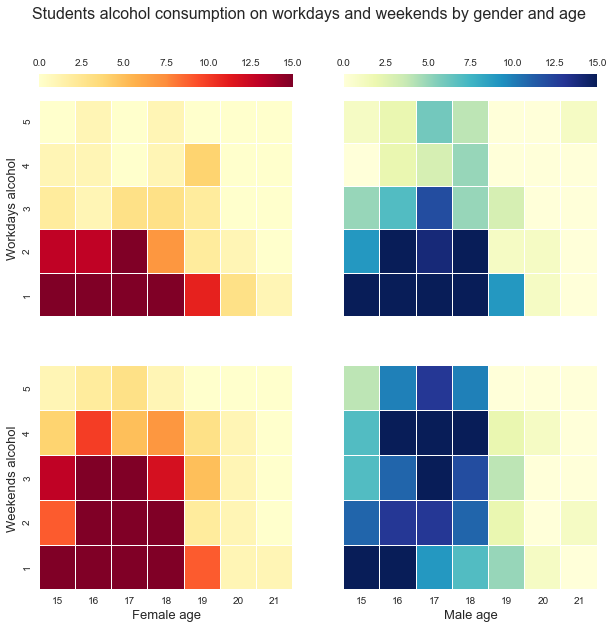

In [98]:
grid_kws = {'height_ratios': (0.845, 0.7)}

f4, axes = plt.subplots(2,2, gridspec_kw=grid_kws, sharey=True)  
f4.set_size_inches(10, 10) 

##############################
pd_crosstab_F = pd.crosstab(df_F["Dalc"], df_F["age"])
sns.heatmap(pd_crosstab_F,  linewidths=0.01, linecolor='white', 
             cmap='YlOrRd',xticklabels =False, yticklabels =np.arange(1,5,1), 
             cbar_kws = dict(use_gridspec=False,location="top"),
             vmin=0, vmax=15, ax=axes[0,0]) 
axes[0,0].invert_yaxis()

axes[0,0].set_ylabel('Workdays alcohol', size=13)  
axes[0,0].set_xlabel('')
axes[0,0].set_title('')

##############################
pd_crosstab_M = pd.crosstab(df1["Dalc"], df1["age"])
sns.heatmap(pd_crosstab_M, linewidths=0.01, linecolor='white', xticklabels =False, 
                yticklabels=True, cmap='YlGnBu',vmin=0, vmax=15, 
                cbar_kws = dict(use_gridspec=False,location="top"), 
                cbar_ax=None, ax=axes[0,1]) # #
axes[0,1].set_ylabel('')  
axes[0,1].set_xlabel('')
axes[0,1].set_title('')

##############################

pd_crosstab_Fd = pd.crosstab(df_F["Walc"], df_F["age"])
sns.heatmap(pd_crosstab_Fd,  linewidths=0.01, linecolor='white', 
            xticklabels =True,  #yticklabels=True,
            cmap='YlOrRd',vmin=0, vmax=15, cbar=False,
            ax=axes[1,0])
#axes[0,1].set_ylabel('Female alcohol consumption', size=11)  
axes[1,0].invert_yaxis()
axes[1,0].set_xlabel('Female age', size=13)
axes[1,0].set_ylabel('Weekends alcohol', size=13)

##############################

pd_crosstab_Md = pd.crosstab(df1["Walc"], df1["age"])
sns.heatmap(pd_crosstab_Md, linewidths=0.01, linecolor='white', xticklabels =True, 
            yticklabels =True, cmap='YlGnBu',vmin=0, vmax=15, cbar=False,
             ax=axes[1,1]),
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel('Male age', size=13)
axes[1,1].set_ylabel('')  

f4.suptitle('Students alcohol consumption on workdays and weekends by gender and age', size=16, y=0.935)

plt.show()

In [99]:
f4.savefig("alcohol4.png") 

#### Among all the plots shown, we have arrived at the best visualization. 

#### <big> Discussions :</big> 
(1) In violinplot function, "scale" {“area”, “count”, “width”} is used to scale the width of each violin. If area, each violin will have the same area. If count, the width of the violins will be scaled by the number of observations in that bin. If width, each violin will have the same width. In this project, the gender ratio is not 1:1, "scale" is set by area.
<br> (2) For splitted violinplots, there are KDEs on both sides, however, the boxplot inside is for both of them. In order to see the quartiles of each splitting parts, we can set inner="quartile" instead of inner="box".
<br> (3) Violinplots are not suitable for small data. 
<br> (4) It is important to select appropriate colormap and scale for heatmap. 